# Question 1
In the code cell below import the 
- Pandas as __pd__, 
- NumPy as __np__, and
- pyplot from matplotlib as __plt__.

# Solution to Question 1

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Question 2

Write a code to perform following:
1. Create a DataFrame by the name of df_ffire.
2. In this DataFrame load a csv file using Pandas __read_csv()__ function
3. Note that CSV file has header record and following are names in the file, you need to rearrange the data in DataFrame in the following order
    - Date Reported
    - Year
    - Month
    - State
    - Number of Fires
5. Display the DataFrame (top 10 rows) and verify that the columns are in order.
6. Generate the Statistical Summary of the DataFrame for all the columns

In [ ]:
df_ffire = pd.read_csv('/content/Brazilian-fire-dataset.csv')
df_ffire.head()

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1/01/1998
1,1999,Acre,January,0.0,1/01/1999
2,2000,Acre,January,0.0,1/01/2000
3,2001,Acre,January,0.0,1/01/2001
4,2002,Acre,January,0.0,1/01/2002


# Solution to Question 2

In [ ]:
df_ffire = pd.read_csv('/content/Brazilian-fire-dataset.csv')
order_col = ['Date Reported', 'Year', 'Month', 'State', 'Number of Fires']
df_ffire['Number of Fires'] = df_ffire['Number of Fires'].astype(int)
df_ffire = df_ffire[order_col]
df_ffire.head(10)

,Date Reported,Year,Month,State,Number of Fires
0,1/01/1998,1998,January,Acre,0
1,1/01/1999,1999,January,Acre,0
2,1/01/2000,2000,January,Acre,0
3,1/01/2001,2001,January,Acre,0
4,1/01/2002,2002,January,Acre,0
5,1/01/2003,2003,January,Acre,10
6,1/01/2004,2004,January,Acre,0
7,1/01/2005,2005,January,Acre,12
8,1/01/2006,2006,January,Acre,4
9,1/01/2007,2007,January,Acre,0


In [ ]:
df_ffire.describe(include='all')

,Date Reported,Year,Month,State,Number of Fires
count,6454,6454.000000,6454,6454,6454.000000
unique,20,NaN,12,27,NaN
top,1/01/1998,NaN,January,Alagoas,NaN
freq,324,NaN,541,240,NaN
mean,NaN,2007.461729,NaN,NaN,108.235358
std,NaN,5.746654,NaN,NaN,190.843947
min,NaN,1998.000000,NaN,NaN,0.000000
25%,NaN,2002.000000,NaN,NaN,3.000000
50%,NaN,2007.000000,NaN,NaN,24.000000
75%,NaN,2012.000000,NaN,NaN,113.000000


# Question 3

1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

# Solution to Question 3

__Questions__
1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

__Answers__
1. 998 Fires in a day is the maximum number of Fires reported
2. Data if available for total 27 states

# Question 4
__Are you able to find which state has recorded the maximum number of fires on any given day (not the total sum), and in which month did it occur?__

HINT: 
- Create a boolean filter based on condition on column __Number of Fires__, and 
- using this filter perform indexing operation on DataFrame to retrieve the corresponding records

# Solution to Question 4 

In [ ]:
max_no_fire = df_ffire['Number of Fires'].max()
df_ffire[df_ffire['Number of Fires']==max_no_fire]

,Date Reported,Year,Month,State,Number of Fires
888,1/01/2008,2008,September,Amazonas,998


#### Add Answer for Activity 1 here

- Add Answer here

# Question 5: Quantitative Analytics for States

1. Calculate the total number of fires for the entire duration (i.e. for 1998 to 2018) for every state
2. Display the DataFrame and verify that results looks OK (i.e. GroupBy and Aggregation has been calcuated correctly)
3. Print the Summary Statistics - and what is the Minimum and Maximum number of total fires records?
4. Which state has recorded minimum number of Total Fires, and which state has recorded maximum number of Total Fires?

__HINT:__
1. Perform the groupby operation on State, and aggregation operation on Number of Fires Columns. 
2. Pandas have methods idxmax() and idxmin() which returns the Series of Index(Row Labels) corresponding to the maximum and minimum values respectively, in a Pandas Series (or a Column in DataFrame)

# Solution to Question 5

In [ ]:
## Add code for Activity 2 here. Add additional code cells for the activities if required

In [ ]:
##Solution for Activity 2 (Step 1, and Step 2)
df_grp_statefires = df_ffire.groupby(['State']).agg({'Number of Fires': np.sum})
df_grp_statefires.head()

,Number of Fires
State,
Acre,18452
Alagoas,4644
Amapá,21831
Amazonas,30636
Bahia,44718


In [ ]:
##Solution for Activity 2 (Step 3)
df_grp_statefires.describe()

,Number of Fires
count,27.000000
mean,25872.259259
std,14251.935889
min,3237.000000
25%,15619.500000
50%,24459.000000
75%,37565.000000
max,51118.000000


In [ ]:
df_grp_statefires.head()

,Number of Fires
State,
Acre,18452
Alagoas,4644
Amapá,21831
Amazonas,30636
Bahia,44718


In [ ]:
df_grp_statefires.idxmax()

Number of Fires    São Paulo
dtype: object

In [ ]:
df_grp_statefires.idxmin()

Number of Fires    Sergipe
dtype: object

In [ ]:
##Solution for Activity 2 (Step 4)
print("Max of Total Fires recorded were %d, and this was for state: %s"\
      %(df_grp_statefires['Number of Fires'].max(),\
             df_grp_statefires.idxmax()[0]))

print("Min of Total Fires recorded were %d, and this was for state: %s"\
      %(df_grp_statefires['Number of Fires'].min(),\
             df_grp_statefires.idxmin()[0]))

Max of Total Fires recorded were 51118, and this was for state: São Paulo
Min of Total Fires recorded were 3237, and this was for state: Sergipe


#Question 6: Plot barplot of total number of fires in each state

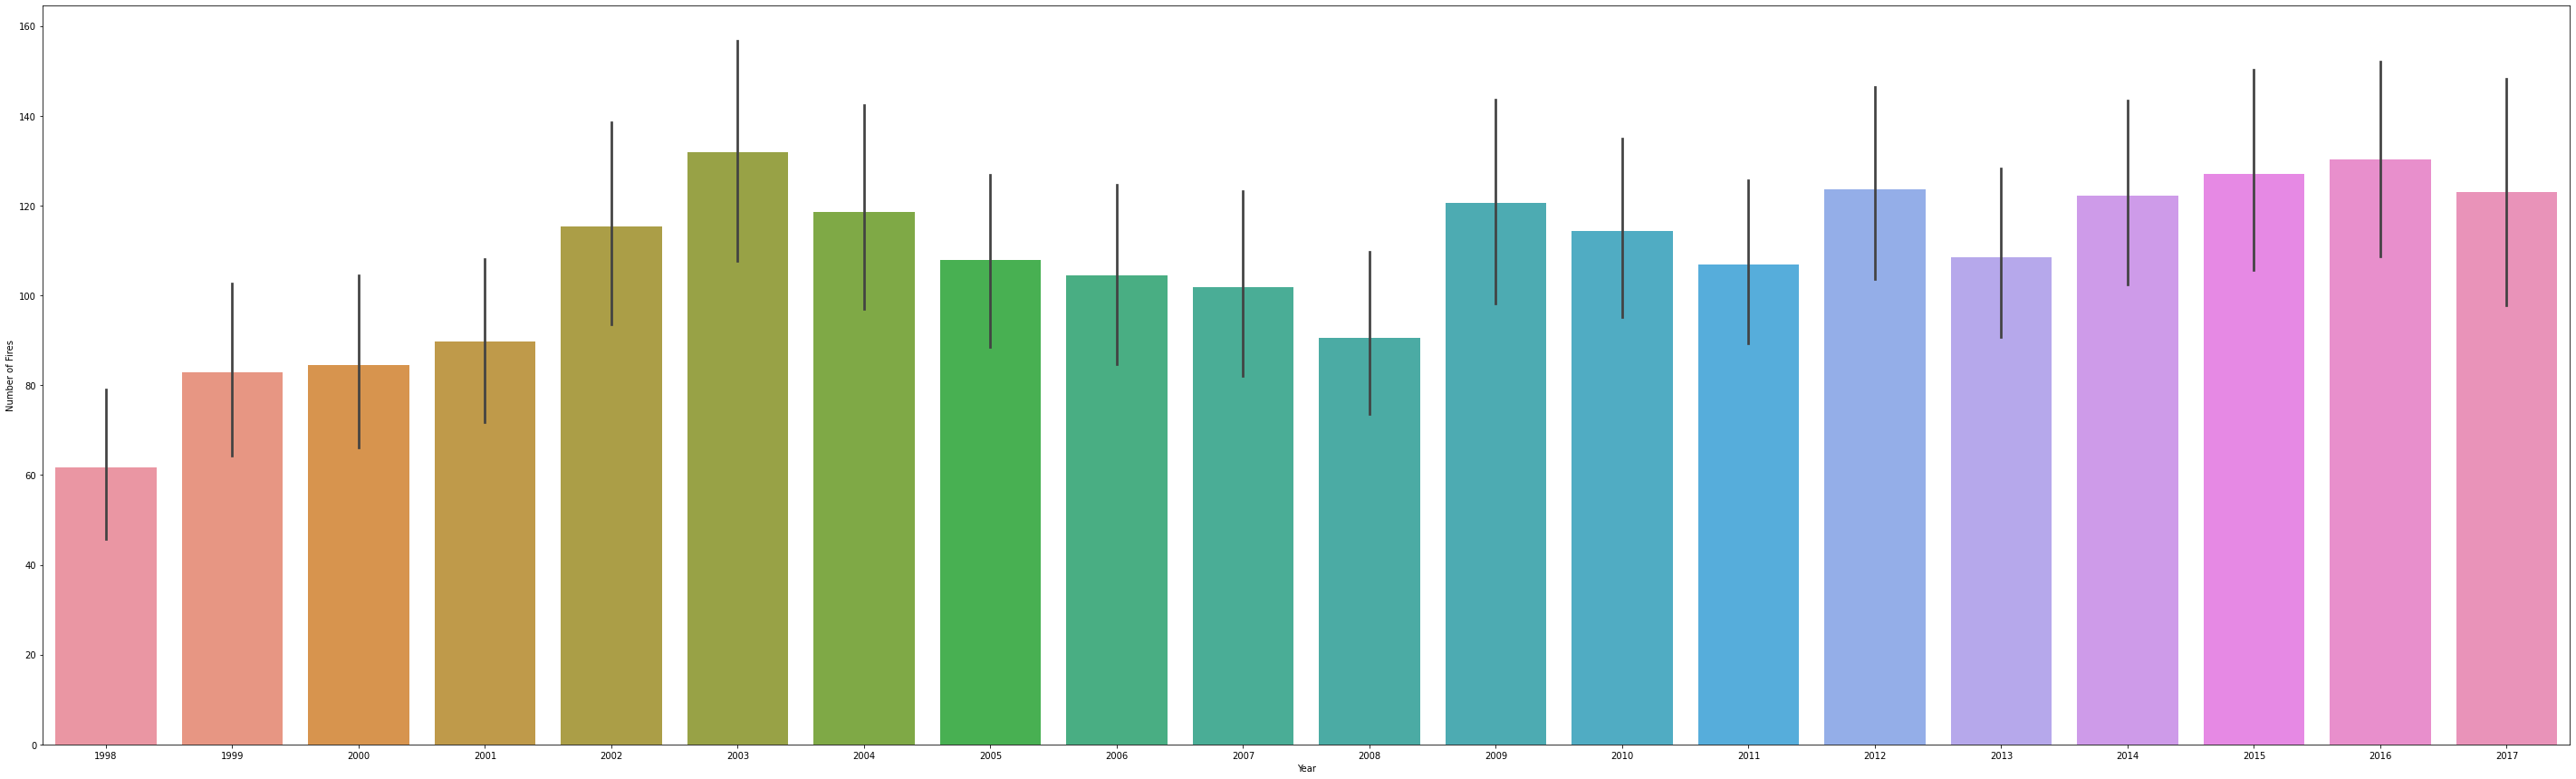

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(50,15))
sns.barplot(x='Year',y='Number of Fires',data=df_ffire)

In [ ]:
df_ffire.isnull().sum()

Date Reported      0
Year               0
Month              0
State              0
Number of Fires    0
dtype: int64